In [1]:
import os
import keras

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定,使用不同的learning rate與optimizer:SGD,RMSprop,AdaGrad,Adam
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]


In [12]:
import itertools

In [13]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 113us/step - loss: 276.5855 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 2/10
50000/50000 [==============================] - 5s 109us/step - loss: 2.3041 - accuracy: 0.1000 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 3/10
50000/50000 [==============================] - 6s 112us/step - loss: 2.3045 - accuracy: 0.0979 - val_loss: 2.3052 - val_accuracy: 0.1000
Epoch 4/10
50000/50000 [==============================] - 5s 109us/step - loss: 2.3049 - accuracy: 0.0987 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 5/10
50000/50000 [==============================] - 5s 109us/step - loss: 2.3049 - accuracy: 0.0990 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 6/10
50000/50000 [==============================] - 5s 109us/step - loss: 2.3055 - accuracy: 0.0974 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 7/10
50000/50000 [==============================] - 6s

Epoch 3/10
50000/50000 [==============================] - 5s 96us/step - loss: 1.7472 - accuracy: 0.3757 - val_loss: 1.7854 - val_accuracy: 0.3603
Epoch 4/10
50000/50000 [==============================] - 5s 95us/step - loss: 1.6920 - accuracy: 0.3942 - val_loss: 1.6709 - val_accuracy: 0.3973
Epoch 5/10
50000/50000 [==============================] - 5s 95us/step - loss: 1.6498 - accuracy: 0.4118 - val_loss: 1.6904 - val_accuracy: 0.3940
Epoch 6/10
50000/50000 [==============================] - 5s 98us/step - loss: 1.6106 - accuracy: 0.4270 - val_loss: 1.6320 - val_accuracy: 0.4176
Epoch 7/10
50000/50000 [==============================] - 5s 97us/step - loss: 1.5743 - accuracy: 0.4404 - val_loss: 1.5800 - val_accuracy: 0.4416
Epoch 8/10
50000/50000 [==============================] - 5s 96us/step - loss: 1.5424 - accuracy: 0.4529 - val_loss: 1.5679 - val_accuracy: 0.4453
Epoch 9/10
50000/50000 [==============================] - 5s 96us/step - loss: 1.5150 - accuracy: 0.4646 - val_loss: 1

50000/50000 [==============================] - 5s 102us/step - loss: 1.6603 - accuracy: 0.4085 - val_loss: 1.6665 - val_accuracy: 0.4004
Epoch 6/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.6094 - accuracy: 0.4250 - val_loss: 1.6194 - val_accuracy: 0.4245
Epoch 7/10
50000/50000 [==============================] - 5s 99us/step - loss: 1.5685 - accuracy: 0.4398 - val_loss: 1.6386 - val_accuracy: 0.4099
Epoch 8/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.5383 - accuracy: 0.4492 - val_loss: 1.8240 - val_accuracy: 0.3565
Epoch 9/10
50000/50000 [==============================] - 5s 102us/step - loss: 1.5035 - accuracy: 0.4638 - val_loss: 1.5795 - val_accuracy: 0.4452
Epoch 10/10
50000/50000 [==============================] - 5s 100us/step - loss: 1.4789 - accuracy: 0.4722 - val_loss: 1.5224 - val_accuracy: 0.4571
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
Model: "model_1"
____________________________

50000/50000 [==============================] - 4s 78us/step - loss: 2.2452 - accuracy: 0.1989 - val_loss: 2.2401 - val_accuracy: 0.2000
Epoch 8/10
50000/50000 [==============================] - 4s 78us/step - loss: 2.2366 - accuracy: 0.2051 - val_loss: 2.2319 - val_accuracy: 0.2074
Epoch 9/10
50000/50000 [==============================] - 4s 78us/step - loss: 2.2285 - accuracy: 0.2108 - val_loss: 2.2242 - val_accuracy: 0.2124
Epoch 10/10
50000/50000 [==============================] - 4s 80us/step - loss: 2.2207 - accuracy: 0.2147 - val_loss: 2.2168 - val_accuracy: 0.2182
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376 

50000/50000 [==============================] - 5s 110us/step - loss: 1.4077 - accuracy: 0.5039 - val_loss: 1.4476 - val_accuracy: 0.4834
Epoch 10/10
50000/50000 [==============================] - 6s 112us/step - loss: 1.3801 - accuracy: 0.5136 - val_loss: 1.4387 - val_accuracy: 0.4880
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.SGD'>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 114us/step - loss: 2.1240 - accuracy: 0.2480 - val_loss: 2.0006 - val_accuracy: 0.3013
Epoch 2/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.9415 - accuracy: 0.3249 - val_loss: 1.8879 - val_accuracy: 0.3472
Epoch 3/10
50000/50000 [==============================] - 6s 112us/step - loss: 1.8591 - accuracy: 0.3562 - val_loss: 1.8301 - val_accuracy: 0.3670
Epoch 4/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.8127 - accuracy: 0.3699 - val_loss: 1.7975 - val_accuracy: 0.3727
Epoch 5/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.7786 - accuracy: 0.3811 - val_loss: 1.7699 - val_accuracy: 0.3787
Epoch 6/10
50000/50000 [==============================] - 5s 109us/step - loss: 1.7516 - accuracy: 0.3920 - val_loss: 1.7424 - val_accuracy: 0.3981
Epoch 7/10
50000/50000 [==============================] - 6s 1

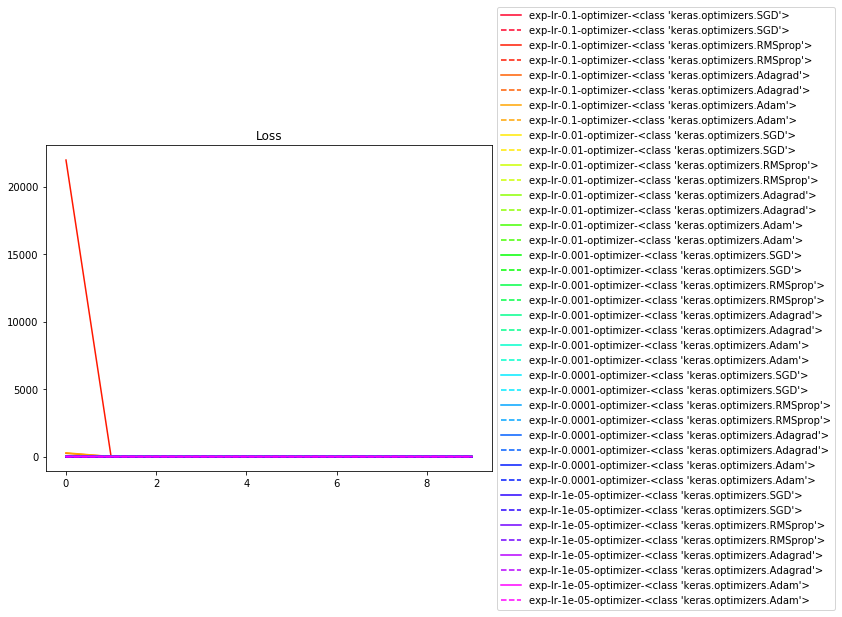

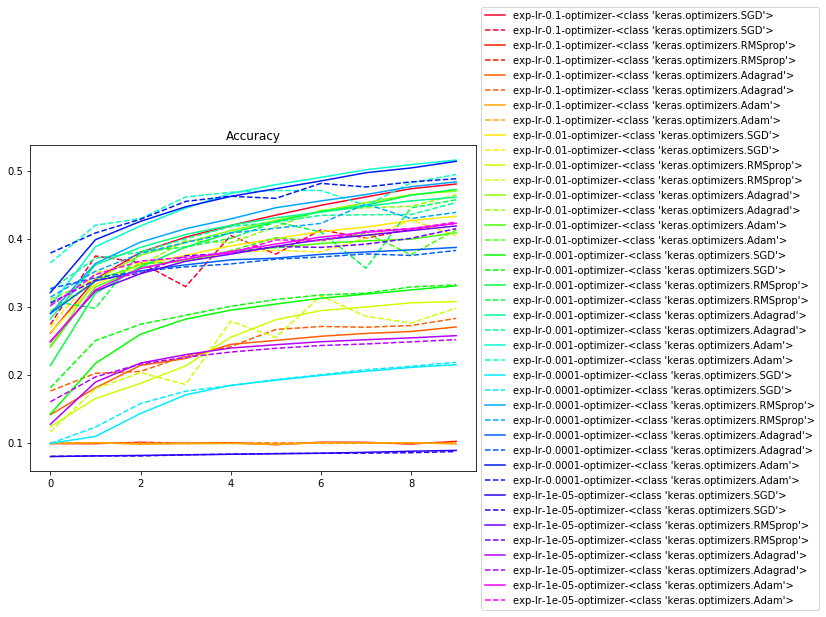

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()